In [1]:
%matplotlib inline

1. Grafique la función de Bessels de orden 5 entre x=0 y x=20 y encuentre sus raíces en ese intervalo

In [42]:
def calculate_Bessels(n, x1, x2):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.special import jn, jn_zeros
    
    x_array = np.linspace(x1, x2, 100)
    plt.plot(x_array, jn(n, x_array), label=r"$J_%d(x)$" % n)
    plt.legend()
    plt.show()
    
    zeros = jn_zeros(n, n-1)
    print(zeros)
    return zeros

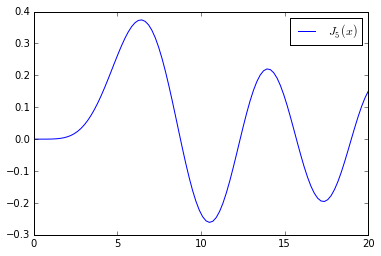

[  8.77148382  12.3386042   15.70017408  18.98013388]


In [43]:
zeros = calculate_Bessels(5, 0, 20)

2.Integre la función de Bessels entre 0 y su 3 raiz.

In [21]:
from scipy.integrate import quad
from scipy.special import jn, jn_zeros

def integrate_Bessel(x, n):
    return jn(n, x)

zeros = calculate_Bessels(5, 0, 20)
x_lower = 0
x_upper = zeros[2]

val, errabs = quad(integrate_Bessel, x_lower, x_upper, args = (5))
print(val, errabs)

(1.2164867281840053, 2.6561881958754936e-14)


3.Calcule las siguientes integrales numéricamente:

In [36]:
import numpy as np
from scipy.integrate import quad

a = [lambda x: x * np.sin(2 * (x ** 3) - 10), 0, 100]
b = [lambda x: x * np.exp((-x ** 2) + 5), -2, 28]
c = [lambda x: 10 * (x ** 3) + (x ** 7), 0, 100]

quad_list = [a, b, c]

for q in quad_list:
    print(quad(q[0], q[1], q[2]))

(-632.2615291067875, 8413.665695923426)
(1.3591409142295419, 1.1806439979793087e-11)
(1250000250000000.5, 13.877790583372024)


4.Calcule el trabajo si el gas se expande de 0.1 $m^3$ a 0.6$m^3$ manteniendo la temperatura constante

In [87]:
# variables constantes

R = 8.314
n = 1
a = 0.657
b = 5.62 * 10 ** -5
T = 298

def vdw_gas_work_integration(V):
    P = ((n * R * T) / (V - (n * b))) - (a * n **2) / (V ** 2)
    return P

val, errrabs = quad(vdw_gas_work_integration, 0.6, 0.1)
val

-4434.898801788306

5.Dada las siguientes matrices, calcule las siguientes operaciones:
(a) Inversa de A
(b) $\exp{A}$
(c) det(B)

In [58]:
import numpy as np

A = np.matrix([[10, 8, 0 , 1],
             [1, 3, 8, 9],
             [5, 9, 0, 1],
             [6, 7, 13, 9]])
B = np.matrix([[9, 8, 7, 4],
             [3, 6, 8, 7],
             [5, 2, 2, 1],
             [6, 12, 0, 9]])

In [75]:
matrix_dict = {"inv_A": A.I, 
               "e_A": np.exp(A), 
               "det_B": np.linalg.det(B), 
               "eig_A": np.linalg.eig(A), 
               "traza_A": np.sum(A.diagonal())
               }

6.Una molécula de agua tiene las siguientes coordenadas cartesianas en Angstrom:

In [127]:
xyz = np.array([[0.000000, 0.000000, 0.000000],[0.758602, 0.000000, 0.504284],[0.758602, 0.000000, -0.504284]])
xyz

array([[ 0.      ,  0.      ,  0.      ],
       [ 0.758602,  0.      ,  0.504284],
       [ 0.758602,  0.      , -0.504284]])

(a) Guarde las coordenadas x,y,z y el símbolo atómico en un array de numpy.
(b) Escriba un diccionario que tiene como llaves símbolos atómicos y como valor la masa
atómica. (O: 15.999 g/mol, H: 1.000 g/mol)

In [108]:
atomic_mass_dict = {"O": 15.999,
                   "H": 1.000
                   }
molecule_atomic_mass = 17.999

In [131]:
def moment_of_inertia(molecule_atomic_mass):
    
    element_xx = np.sum(molecule_atomic_mass * ((xyz[:,1] ** 2) + (xyz[:, 2] ** 2)))
    element_yy = np.sum(molecule_atomic_mass * ((xyz[:,0] ** 2) + (xyz[:, 2] ** 2)))
    element_zz = np.sum(molecule_atomic_mass * ((xyz[:,0] ** 2) + (xyz[:, 1] ** 2)))
    element_xy = np.sum(molecule_atomic_mass * (xyz[:, 1] + xyz[:, 0]))
    element_xz = np.sum(molecule_atomic_mass * (xyz[:, 0] + xyz[:, 2]))
    element_yz = np.sum(molecule_atomic_mass * (xyz[:, 1] + xyz[:, 2]))
    element_yx = element_xy
    element_zx = element_xz
    element_zy = element_yz
    
    inertia_tensor = np.matrix([[element_xx, element_xy, element_xz],
                                [element_yx, element_yy, element_yz],
                                [element_zx, element_zy, element_zz]])
    
    return (inertia_tensor)

In [134]:
water_moi = moment_of_inertia(molecule_atomic_mass)
water_moi_eig = np.linalg.eigvals(water_moi)
print(water_moi_eig)

[-22.40508669  57.07570959  25.07017097]


7.Resuelva numéricamente la siguiente ecuación diferencial y grafique tanto la solución numérica como la solución analítica entre 0 y 5 y compare ambos
resultados.    


In [136]:
from scipy.integrate import odeint

In [ ]:
def